In [32]:
# imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

color = sns.color_palette()
sns.set_style("dark")
warnings.filterwarnings("ignore")

In [33]:
# importing datasets
restaurant = pd.read_csv('restaurant.csv')
restaurant

,Unnamed: 0,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,1,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ..."
1,5,CF33F8-E6oudUQ46HnavjQ,Sonic Drive-In,615 S Main St,Ashland City,TN,37015,36.269593,-87.058943,2.0,6,1,"{'BusinessParking': 'None', 'BusinessAcceptsCr...","Burgers, Fast Food, Sandwiches, Food, Ice Crea...","{'Monday': '0:0-0:0', 'Tuesday': '6:0-22:0', '..."
2,8,k0hlBqXX-Bt0vf1op7Jr1w,Tsevi's Pub And Grill,8025 Mackenzie Rd,Affton,MO,63123,38.565165,-90.321087,3.0,19,0,"{'Caters': 'True', 'Alcohol': ""u'full_bar'"", '...","Pubs, Restaurants, Italian, Bars, American (Tr...",NaN
3,9,bBDDEgkFA1Otx9Lfe7BZUQ,Sonic Drive-In,2312 Dickerson Pike,Nashville,TN,37207,36.208102,-86.768170,1.5,10,1,"{'RestaurantsAttire': ""'casual'"", 'Restaurants...","Ice Cream & Frozen Yogurt, Fast Food, Burgers,...","{'Monday': '0:0-0:0', 'Tuesday': '6:0-21:0', '..."
4,11,eEOYSgkmpB90uNA7lDOMRA,Vietnamese Food Truck,NaN,Tampa Bay,FL,33602,27.955269,-82.456320,4.0,10,1,"{'Alcohol': ""'none'"", 'OutdoorSeating': 'None'...","Vietnamese, Food, Restaurants, Food Trucks","{'Monday': '11:0-14:0', 'Tuesday': '11:0-14:0'..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52263,150325,l9eLGG9ZKpLJzboZq-9LRQ,Wawa,19 N Bishop Ave,Clifton Heights,PA,19018,39.925656,-75.310344,3.0,11,1,"{'BikeParking': 'True', 'BusinessAcceptsCredit...","Restaurants, Sandwiches, Convenience Stores, C...","{'Monday': '0:0-0:0', 'Tuesday': '0:0-0:0', 'W..."
52264,150327,cM6V90ExQD6KMSU3rRB5ZA,Dutch Bros Coffee,1181 N Milwaukee St,Boise,ID,83704,43.615401,-116.284689,4.0,33,1,"{'WiFi': ""'free'"", 'RestaurantsGoodForGroups':...","Cafes, Juice Bars & Smoothies, Coffee & Tea, R...","{'Monday': '0:0-0:0', 'Tuesday': '0:0-17:0', '..."
52265,150336,WnT9NIzQgLlILjPT0kEcsQ,Adelita Taqueria & Restaurant,1108 S 9th St,Philadelphia,PA,19147,39.935982,-75.158665,4.5,35,1,"{'WheelchairAccessible': 'False', 'Restaurants...","Restaurants, Mexican","{'Monday': '11:0-22:0', 'Tuesday': '11:0-22:0'..."
52266,150339,2O2K6SXPWv56amqxCECd4w,The Plum Pit,4405 Pennell Rd,Aston,DE,19014,39.856185,-75.427725,4.5,14,1,"{'RestaurantsDelivery': 'False', 'BusinessAcce...","Restaurants, Comfort Food, Food, Food Trucks, ...","{'Monday': '0:0-0:0', 'Tuesday': '0:0-0:0', 'W..."


[Text(0, 0, '247'),
 Text(0, 0, '1481'),
 Text(0, 0, '2909'),
 Text(0, 0, '4850'),
 Text(0, 0, '7639'),
 Text(0, 0, '11794'),
 Text(0, 0, '13438'),
 Text(0, 0, '8357'),
 Text(0, 0, '1553')]

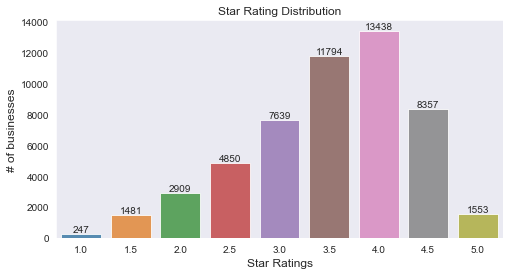

In [34]:
# rating distribution
stars = restaurant['stars'].value_counts()
stars = stars.sort_index()

# plot
plt.figure(figsize=(8,4))
ax = sns.barplot(stars.index, stars.values, alpha=0.8)
plt.title("Star Rating Distribution")
plt.ylabel("# of businesses", fontsize=12)
plt.xlabel('Star Ratings', fontsize=12)
ax.bar_label(ax.containers[0], label_type='edge')



[Text(0, 0, '52268'),
 Text(0, 0, '15472'),
 Text(0, 0, '8723'),
 Text(0, 0, '8366'),
 Text(0, 0, '8337'),
 Text(0, 0, '8139'),
 Text(0, 0, '7093'),
 Text(0, 0, '6472'),
 Text(0, 0, '6239'),
 Text(0, 0, '6097'),
 Text(0, 0, '5636'),
 Text(0, 0, '4600'),
 Text(0, 0, '4573'),
 Text(0, 0, '4053'),
 Text(0, 0, '3539'),
 Text(0, 0, '3169'),
 Text(0, 0, '3068'),
 Text(0, 0, '3064'),
 Text(0, 0, '2966'),
 Text(0, 0, '2756')]

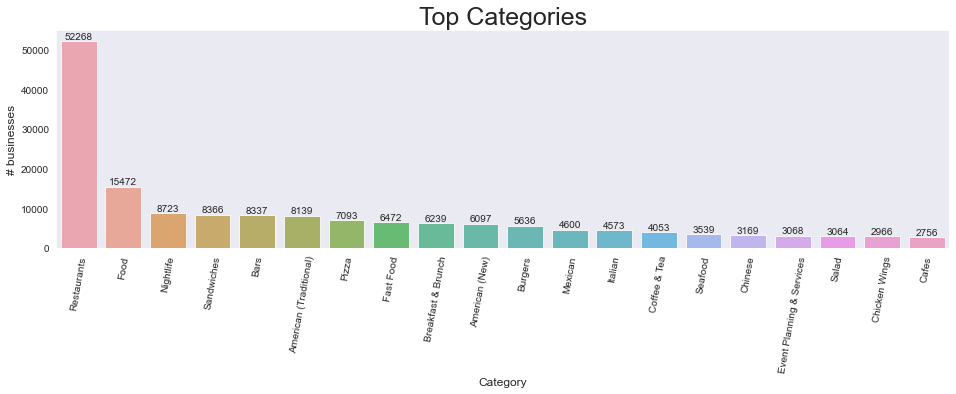

In [35]:
# top business categories
categories = pd.Series(restaurant['categories']).str.get_dummies(', ')
x = categories.sum()
x = x.sort_values(ascending=False)
x = x.iloc[0:20]
# print(x)

plt.figure(figsize=(16, 4))
ax = sns.barplot(x.index, x.values, alpha=0.8)
plt.title("Top Categories", fontsize=25)
locs, labels = plt.xticks()
plt.setp(labels, rotation=80)
plt.ylabel('# businesses', fontsize=12)
plt.xlabel('Category', fontsize=12)
ax.bar_label(ax.containers[0], label_type='edge')

[Text(0, 0, '5852'),
 Text(0, 0, '2960'),
 Text(0, 0, '2862'),
 Text(0, 0, '2502'),
 Text(0, 0, '2466'),
 Text(0, 0, '2259'),
 Text(0, 0, '2166'),
 Text(0, 0, '1790'),
 Text(0, 0, '1286'),
 Text(0, 0, '847'),
 Text(0, 0, '767'),
 Text(0, 0, '678'),
 Text(0, 0, '619'),
 Text(0, 0, '543'),
 Text(0, 0, '522'),
 Text(0, 0, '491'),
 Text(0, 0, '444'),
 Text(0, 0, '404'),
 Text(0, 0, '334'),
 Text(0, 0, '326')]

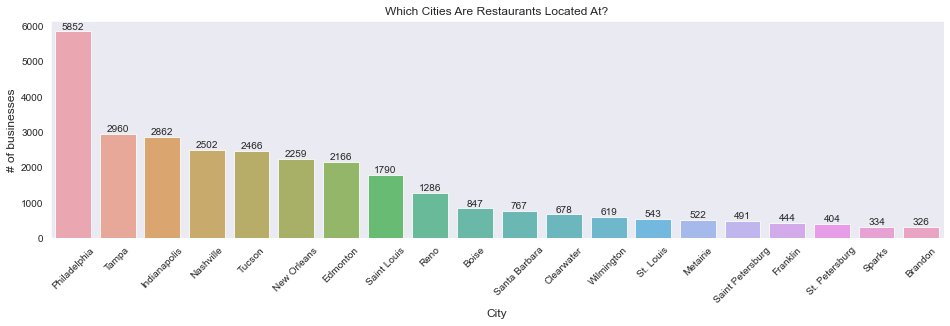

In [36]:
# where are the reviews from?
city = restaurant['city'].value_counts()
city = city.sort_values(ascending=False)
city = city.iloc[0:20]

plt.figure(figsize=(16,4))
ax = sns.barplot(city.index, city.values, alpha=0.8)
plt.title("Which Cities Are Restaurants Located At?")
locs, labels = plt.xticks()
plt.setp(labels, rotation=45)
plt.ylabel('# of businesses', fontsize=12)
plt.xlabel('City', fontsize=12)
ax.bar_label(ax.containers[0], label_type='edge')